In [1]:
from txtai import Embeddings
from txtai.pipeline import Textractor

# Create textractor model
textractor = Textractor()

# Create an embeddings
embeddings = Embeddings(path="sentence-transformers/nli-mpnet-base-v2")

In [6]:
# Extract text from documents
textractor("knowledgebase/data_science.md")

"# Data Science: From Data to Insights\n\n## What is Data Science?\n\nData science is an interdisciplinary field that uses scientific methods, processes, algorithms, and systems to extract knowledge and insights from structured and unstructured data. It combines expertise from various fields, including statistics, computer science, information science, and domain knowledge.\n\nData scientists use their skills to analyze complex data, identify patterns, and generate actionable insights that can help organizations make better decisions. The field has grown exponentially in recent years due to the increasing availability of big data and advances in computing power.\n\n## The Data Science Process\n\n### Data Collection\n\nThe first step in any data science project is collecting relevant data. This can come from various sources:\n- Databases\n- APIs\n- Web scraping\n- Sensors and IoT devices\n- Surveys and forms\n- Public datasets\n\nData collection must be done ethically and in compliance 

In [ ]:
textractor = Textractor(paragraphs=True)
for paragraph in textractor("knowledgebase/data_science.md"):
  print(paragraph, "\n----")

In [ ]:
textractor = Textractor(sections=True)
print("\n[PAGE BREAK]\n".join(section for section in textractor("knowledgebase/data_science.md")))

In [35]:
from txtai.app import Application

# Create and run application
app = Application("path: ../.txtai/kb-test")
# Access the embeddings object
embeddings = app.embeddings

# Print the full embeddings configuration in a more readable format
import json
print(json.dumps(embeddings.config, indent=2))

# Check if graph is available
print(f"\nHas Graph: {hasattr(embeddings, 'graph')}")
if hasattr(embeddings, 'graph') and embeddings.graph:
    print(f"Graph Node Count: {embeddings.graph.count()}")

{
  "path": "sentence-transformers/nli-mpnet-base-v2",
  "normalize": true,
  "hybrid": true,
  "gpu": true,
  "storagetype": "sqlite",
  "storagepath": ".txtai/embeddings/kb-test",
  "writable": true,
  "content": true,
  "graph": {
    "backend": "networkx",
    "batchsize": 256,
    "limit": 5,
    "minscore": 0.6,
    "approximate": true,
    "topics": {
      "algorithm": "louvain",
      "terms": 4
    },
    "centrality": "pagerank",
    "directed": false,
    "weight": "similarity",
    "search": {
      "max_hops": 2,
      "use_centrality": true,
      "min_score": 0.3
    }
  },
  "scoring": {
    "method": "bm25",
    "normalize": true,
    "terms": {
      "cachelimit": 1000000000,
      "cutoff": 0.001
    }
  },
  "dimensions": 768,
  "backend": "faiss",
  "offset": 98,
  "build": {
    "create": "2025-03-03T13:41:42Z",
    "python": "3.10.16",
    "settings": {
      "components": "IDMap,Flat"
    },
    "system": "Darwin (arm64)",
    "txtai": "8.3.1"
  },
  "update": 

In [36]:
app.search("what is data science")

[{'id': 'f6274c55dd116e4d32c3d1749b7fc336-0',
  'text': 'Data science is an interdisciplinary field that uses scientific methods, processes, algorithms, and systems to extract knowledge and insights from structured and unstructured data. It combines expertise from various fields, including statistics, computer science, information science, and domain knowledge.',
  'score': 0.5643930583276386},
 {'id': 'f6274c55dd116e4d32c3d1749b7fc336-2',
  'text': 'The first step in any data science project is collecting relevant data. This can come from various sources:\n- Databases\n- APIs\n- Web scraping\n- Sensors and IoT devices\n- Surveys and forms\n- Public datasets',
  'score': 0.5091833229797302},
 {'id': 'f6274c55dd116e4d32c3d1749b7fc336-17',
  'text': 'In healthcare, data science is used for:\n- Disease prediction and diagnosis\n- Medical image analysis\n- Drug discovery\n- Patient monitoring\n- Healthcare resource optimization\n- Genomics research',
  'score': 0.4820323260303662},
 {'id':

In [38]:
embeddings.search("data science", limit=50)

[{'id': 'f6274c55dd116e4d32c3d1749b7fc336-0',
  'text': 'Data science is an interdisciplinary field that uses scientific methods, processes, algorithms, and systems to extract knowledge and insights from structured and unstructured data. It combines expertise from various fields, including statistics, computer science, information science, and domain knowledge.',
  'score': 0.5268415234110821},
 {'id': 'f6274c55dd116e4d32c3d1749b7fc336-17',
  'text': 'In healthcare, data science is used for:\n- Disease prediction and diagnosis\n- Medical image analysis\n- Drug discovery\n- Patient monitoring\n- Healthcare resource optimization\n- Genomics research',
  'score': 0.4660310475790798},
 {'id': 'f6274c55dd116e4d32c3d1749b7fc336-28',
  'text': "Data science continues to evolve rapidly, driven by technological advances and growing data availability. As organizations increasingly recognize the value of data-driven decision making, the demand for data science expertise will continue to grow. How

In [39]:
graph = embeddings.search("data science", 100, graph=True)

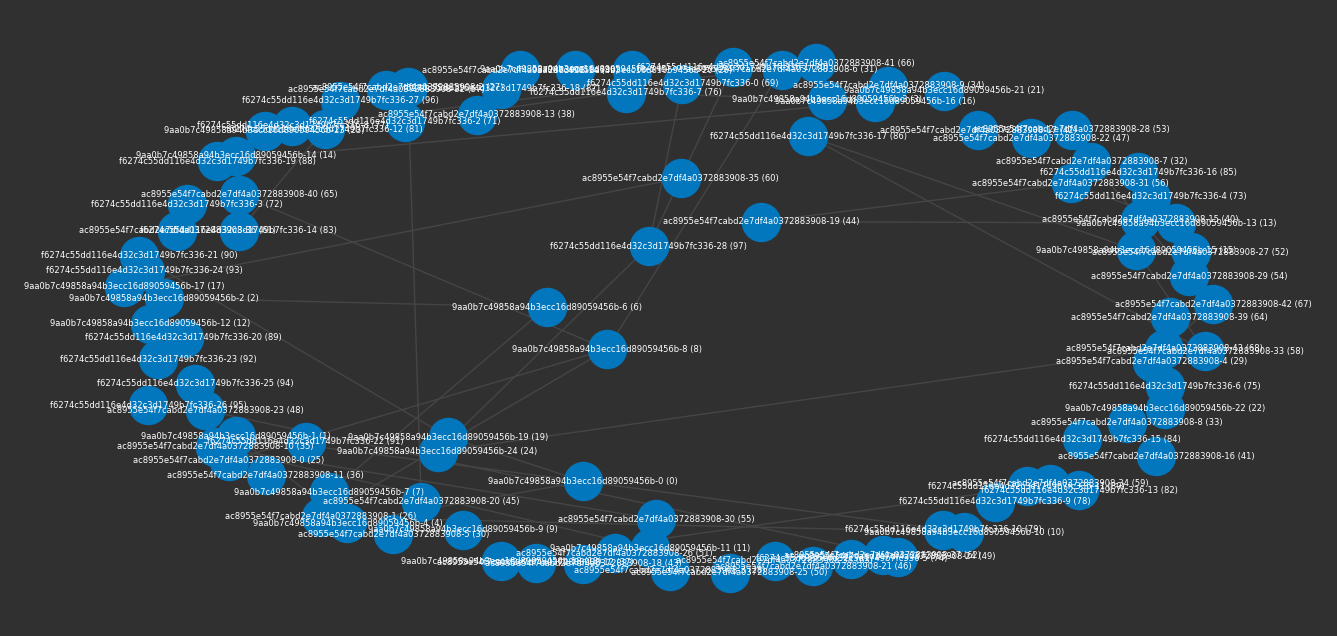

In [40]:
import matplotlib.pyplot as plt
import networkx as nx

def plot(graph):
    labels = {x: f"{graph.attribute(x, 'id')} ({x})" for x in graph.scan()}
    options = {
        "node_size": 750,
        "node_color": "#0277bd",
        "edge_color": "#454545",
        "font_color": "#fff",
        "font_size": 6,
        "alpha": 1.0
    }

    fig, ax = plt.subplots(figsize=(17, 8))
    pos = nx.spring_layout(graph.backend, seed=0, k=0.9, iterations=50)
    nx.draw_networkx(graph.backend, pos=pos, labels=labels, **options)
    ax.set_facecolor("#303030")
    ax.axis("off")
    fig.set_facecolor("#303030")

    plt.show()

plot(graph)

In [41]:
for x in list(graph.centrality().keys())[:20]:
    print(graph.node(x))

{'id': '9aa0b7c49858a94b3ecc16d89059456b-0', 'text': 'Machine learning is a field of study that gives computers the ability to learn without being explicitly programmed. It is a branch of artificial intelligence based on the idea that systems can learn from data, identify patterns, and make decisions with minimal human intervention.', 'topic': 'gives_patterns_machine_artificial', 'topicrank': 0, 'score': 0.1897552827612724}
{'id': '9aa0b7c49858a94b3ecc16d89059456b-8', 'text': 'Deep learning is a subset of machine learning that uses neural networks with multiple layers (deep neural networks) to analyze various factors of data. It is inspired by the structure and function of the human brain, specifically the interconnecting of many neurons.', 'topic': 'neural_many_layers_subset', 'topicrank': 0, 'score': 0.2123035562700652}
{'id': 'f6274c55dd116e4d32c3d1749b7fc336-28', 'text': "Data science continues to evolve rapidly, driven by technological advances and growing data availability. As or

In [44]:
from txtai import LLM
llm = LLM("deepseek-chat", api_key=" sk-6a89fd42796a4e1fac019ba9a530c8ab")

OSError: deepseek-chat is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [46]:
from txtai import LLM
llm = LLM(model="deepseek-chat", api_key="sk-6a89fd42796a4e1fac019ba9a530c8ab")

AttributeError: 'str' object has no attribute 'model'